In [1]:
from FultonMarketAnalysis import FultonMarketAnalysis
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [4]:
test_dir = '/home/dcooper/git/FultonMarket/Test_Cases/'
input_dir = os.path.join(test_dir, 'FM_test')
input_pdb = os.path.join(test_dir, 'input', '7OH.pdb')
fma = FultonMarketAnalysis(input_dir=input_dir, pdb=input_pdb)

11/17/2024 14:05:01 // Found storage directory at /home/dcooper/git/FultonMarket/Test_Cases/FM_test/saved_variables
11/17/2024 14:05:02 // Shapes of temperature arrays: [(0, (5,)), (1, (10,)), (2, (10,)), (3, (10,))]
11/17/2024 14:05:02 // Detected interpolations at: [[1, 3, 5, 7, 8], [], [], []]



******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


11/17/2024 14:05:02 // Shape of final energies determined to be: (74, 10, 10)


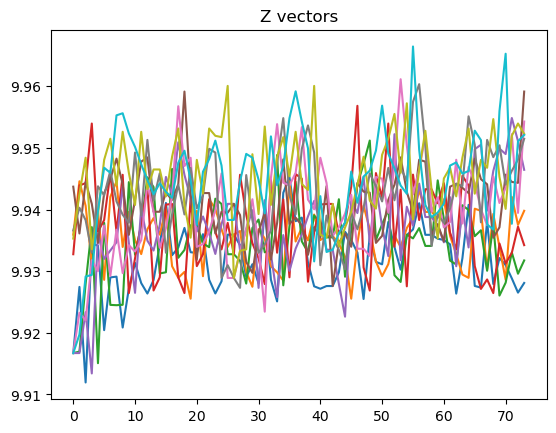

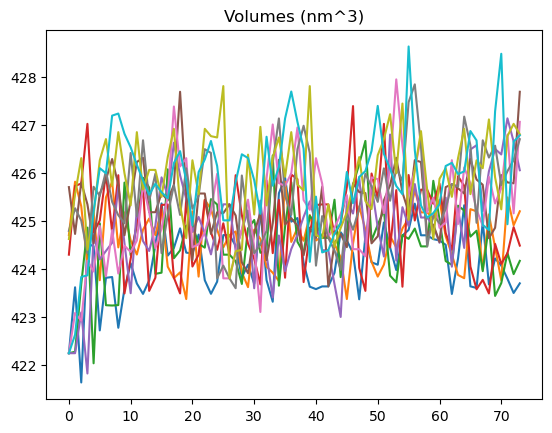

In [19]:
# Load pos, box_vectors
fma._load_positions_box_vecs()

# Get box vectors for each state
box_vectors = np.zeros((fma.energies.shape[0], fma.energies.shape[1], 3, 3))
box_volumes = np.zeros((fma.energies.shape[0], fma.energies.shape[1]))
for iter in range(fma.energies.shape[0]):
    for state in range(fma.energies.shape[1]):

        # Get map
        sim_no, sim_iter, sim_rep_ind = fma.map[iter, state].astype(int)
        
        box_vectors[iter, state] = fma.box_vectors[sim_no][sim_iter][sim_rep_ind]
        box_volumes[iter, state] = np.product(np.diag(fma.box_vectors[sim_no][sim_iter][sim_rep_ind]))

# Plot z vectors
plt.plot(box_vectors[:,:,2,2])
plt.title('Z vectors')
plt.show()

# Plot volumes
plt.plot(box_volumes)
plt.title('Volumes (nm^3)')
plt.show()